In [1]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing import event_accumulator

In [2]:
logs_base = "..\\..\\src\\nn\\logs\\MelodyNet"

denoise_logs = [
    "denoise_0.0",
    "denoise_0.2",
    "denoise_0.4",
    "denoise_0.6",
    "denoise_0.8",
    "denoise_1.0"
]

lstm_logs = [
    "denoise_0.2",
    "lstm"
]

In [3]:
def smooth_curve(values, smoothing=0.9):
    smoothed = []
    last = values[0]
    for v in values:
        last = last * smoothing + (1 - smoothing) * v
        smoothed.append(last)
    return smoothed

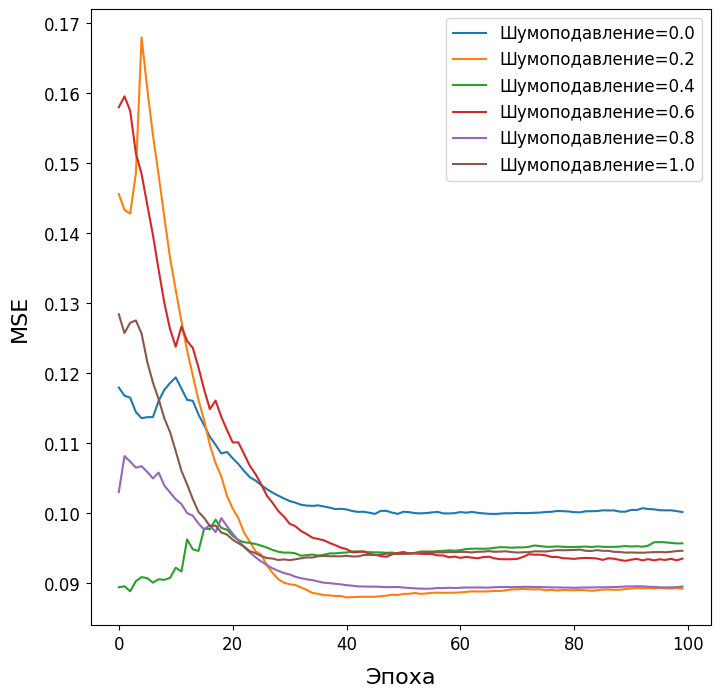

In [4]:
ea = event_accumulator.EventAccumulator(f"{logs_base}\\{denoise_logs[0]}")

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for log in denoise_logs:
    ea = event_accumulator.EventAccumulator(f"{logs_base}\\{log}")
    ea.Reload()

    loss_events = ea.Scalars('val_loss')

    steps = [e.step for e in loss_events]
    values = [e.value for e in loss_events]
    smoothed_values = smooth_curve(values, smoothing=0.9)

    ax.plot(np.arange(len(values)), smoothed_values, label=f"Шумоподавление={log.removeprefix('denoise_')}")

plt.xlabel("Эпоха", fontsize=16, labelpad=10)
plt.ylabel("MSE", fontsize=16, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

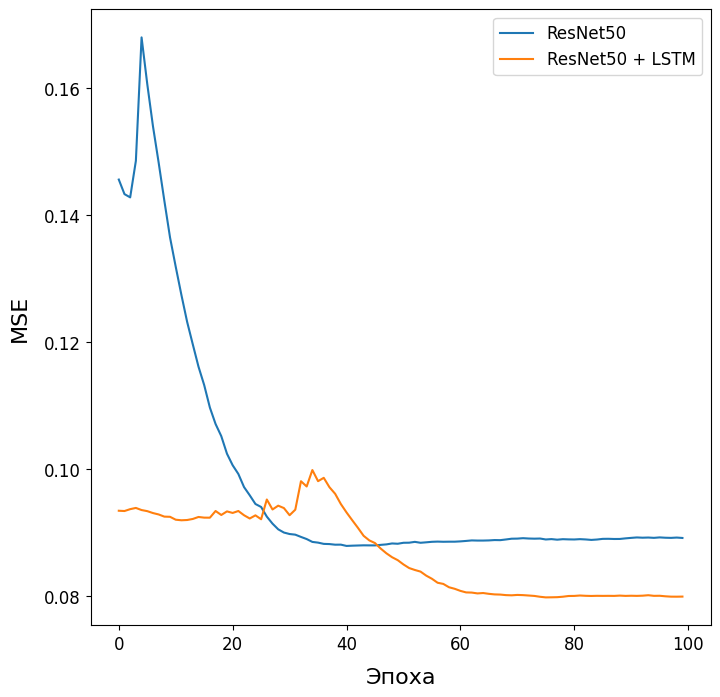

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for log in lstm_logs:
    ea = event_accumulator.EventAccumulator(f"{logs_base}\\{log}")
    ea.Reload()

    loss_events = ea.Scalars('val_loss')

    steps = [e.step for e in loss_events]
    values = [e.value for e in loss_events]
    smoothed_values = smooth_curve(values, smoothing=0.9)

    label="ResNet50" if log=="denoise_0.2" else "ResNet50 + LSTM"
    ax.plot(np.arange(len(values)), smoothed_values, label=label)

plt.xlabel("Эпоха", fontsize=16, labelpad=10)
plt.ylabel("MSE", fontsize=16, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()